# Sonar Rock vs Mine Prediction

This is a binary classification problem. I used a dataset of 60 sonar signal readings to predict whether an object is a **rock** or a **mine**. The goal is to build an accurate model using machine learning, and understand each step of the ML workflow from start to finish.

In [1]:
# Import the necessary libraries

# Data handling
import pandas as pd
import numpy as np

# Visualization tools
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning tools from sklearn
from sklearn.model_selection import(
                            train_test_split,
                            cross_val_score,
                            GridSearchCV,
                            RandomizedSearchCV)
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Evaluation tools
from sklearn.metrics import(
                    accuracy_score,
                    confusion_matrix,
                    classification_report,
                    ConfusionMatrixDisplay
)

# Load the dataset

In [2]:
# Load the dataset
sonar_df = pd.read_csv("Datasets/Sonar data", header=None)

In [3]:
# Display the first few rows
sonar_df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [4]:
# Display column names
sonar_df.columns

Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60],
      dtype='int64')

In [5]:
# Add column name(s)
sonar_df.columns = [str(i) for i in range(60)] + ['Label']
sonar_df

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,Label
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


In [6]:
# Display the number of rows and columns
sonar_df.shape

(208, 61)

# Data Inspection

In [7]:
# Check data types and null columns
sonar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
 10  10      208 non-null    float64
 11  11      208 non-null    float64
 12  12      208 non-null    float64
 13  13      208 non-null    float64
 14  14      208 non-null    float64
 15  15      208 non-null    float64
 16  16      208 non-null    float64
 17  17      208 non-null    float64
 18  18      208 non-null    float64
 19  19      208 non-null    float64
 20  20      208 non-null    float64
 21  21      208 non-null    float64
 22  22

In [8]:
# Describe basic statistics for numeric features
sonar_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [9]:
# Check for missing values
sonar_df.isnull().sum()

0        0
1        0
2        0
3        0
4        0
        ..
56       0
57       0
58       0
59       0
Label    0
Length: 61, dtype: int64

In [10]:
# Class distribution (label balance)
sonar_df['Label'].value_counts()

Label
M    111
R     97
Name: count, dtype: int64

# Visualization

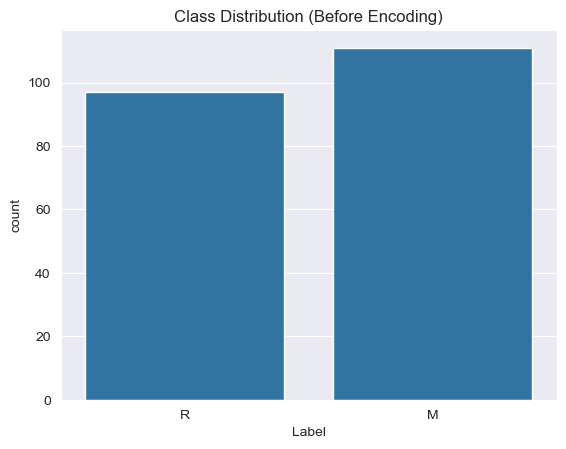

In [11]:
# Class Balance Before Modeling
sns.countplot(data=sonar_df, x='Label')
plt.title('Class Distribution (Before Encoding)')
plt.show()

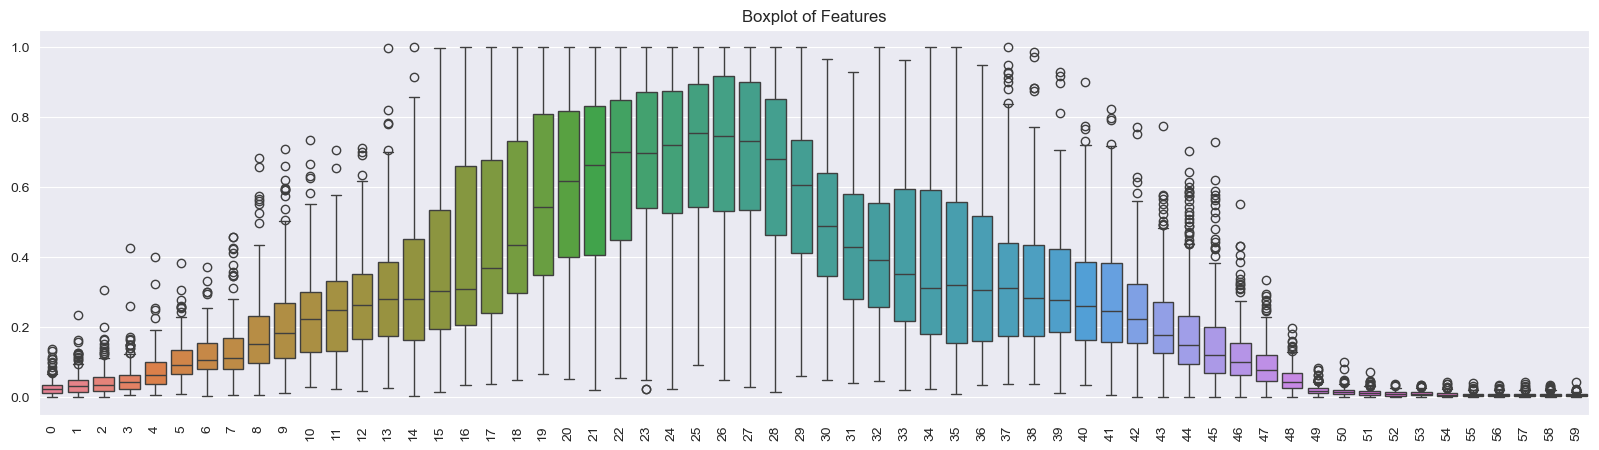

In [12]:
# Correlation Heatmap
plt.figure(figsize=(20, 5))
sns.boxplot(data=sonar_df.drop('Label', axis=1))
plt.title("Boxplot of Features")
plt.xticks(rotation=90)
plt.show()

# Label Encoding

In [13]:
Encoder = LabelEncoder()
sonar_df['Label'] = Encoder.fit_transform(sonar_df['Label'])

# Check the result
sonar_df['Label'].value_counts()

Label
0    111
1     97
Name: count, dtype: int64

# Feature Scaling (Standardization)

In [14]:
# Separate the features and label
X = sonar_df.drop('Label', axis=1)
y = sonar_df['Label']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to dataframe for readability
X = pd.DataFrame(X_scaled, columns=X.columns)

# Show few rows
sonar_df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,Label
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,1
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,1
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,1
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,1
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,1


# Split the Dataset into Training and Testing Sets

In [15]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (166, 60)
X_test shape: (42, 60)


# Train the First Model (Logistic Regression)

In [16]:
# Create model
log_model = LogisticRegression()

# Train on training data
log_model.fit(X_train, y_train)

# Predict on test data
y_pred = log_model.predict(X_test)

# Show prediction
print("First 10 Predictions:", y_pred[:10])

First 10 Predictions: [1 1 1 0 0 0 0 1 0 1]


# Evaluate the Model

Accuracy: 83.33 %
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.95      0.86        22
           1       0.93      0.70      0.80        20

    accuracy                           0.83        42
   macro avg       0.86      0.83      0.83        42
weighted avg       0.85      0.83      0.83        42



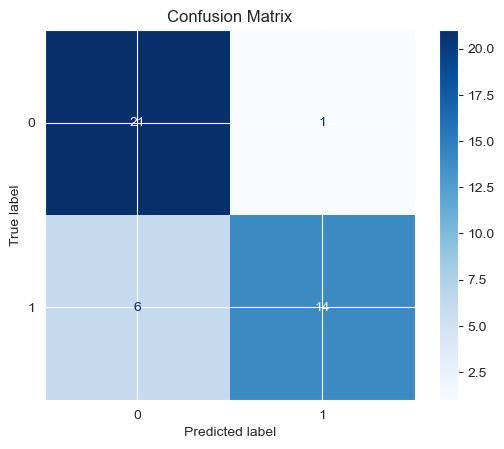

In [17]:
# Evaluate the model
acc = accuracy_score(y_test, y_pred)
# Print accuracy score
print("Accuracy:", round(acc * 100, 2), "%")

cr = classification_report(y_test, y_pred)

# Print classification report
print("Classification Report:\n", cr)

cm = confusion_matrix(y_test, y_pred)
# Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=log_model.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

# Train the Second Model ( Random Forest Classifier)

Random Forest Accuracy: 88.1 %

Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.81      1.00      0.90        22
           1       1.00      0.75      0.86        20

    accuracy                           0.88        42
   macro avg       0.91      0.88      0.88        42
weighted avg       0.90      0.88      0.88        42


Confusion Matrix:
[[22  0]
 [ 5 15]]


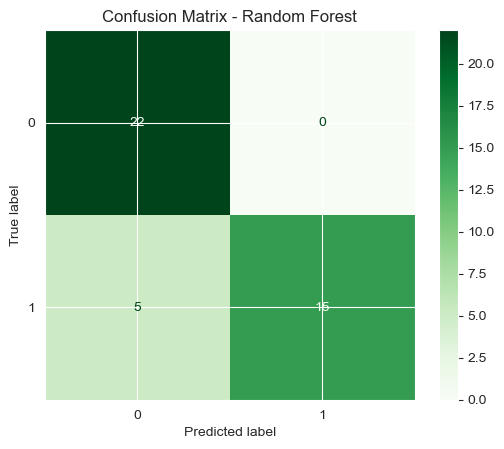

In [18]:
# Create model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict the model
y_pred_rf = rf_model.predict(X_test)

# Evaluate performance
print("Random Forest Accuracy:", round(accuracy_score(y_test, y_pred_rf) * 100, 2), "%")

# Classification report
print("\nClassification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf))

# Confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("\nConfusion Matrix:")
print(cm_rf)

# Visualize confusion matrix
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=rf_model.classes_)
disp_rf.plot(cmap="Greens")
plt.title("Confusion Matrix - Random Forest")
plt.show()


# Feature Importance

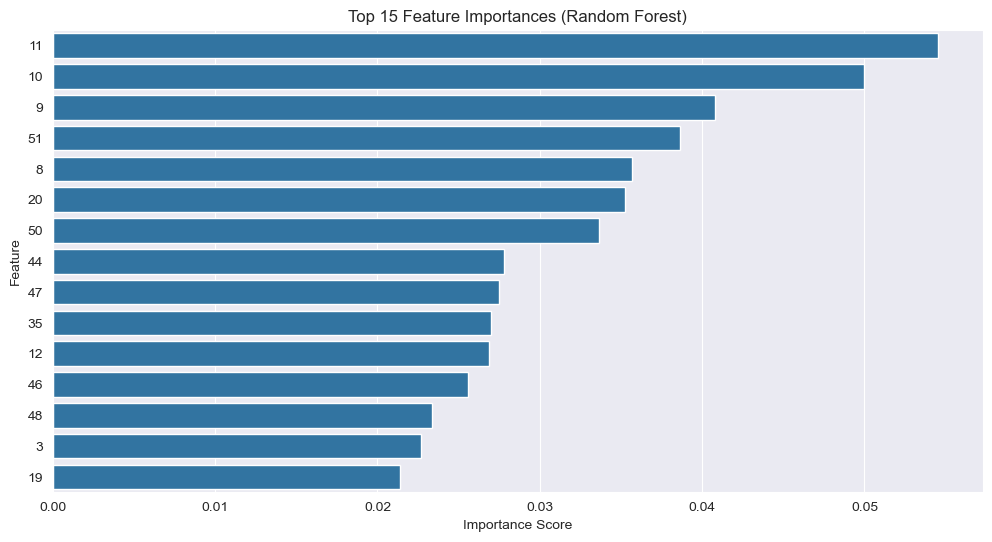

In [19]:
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

plt.figure(figsize=(12, 6))
sns.barplot(x=importances[indices][:15], y=features[indices][:15])
plt.title("Top 15 Feature Importances (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

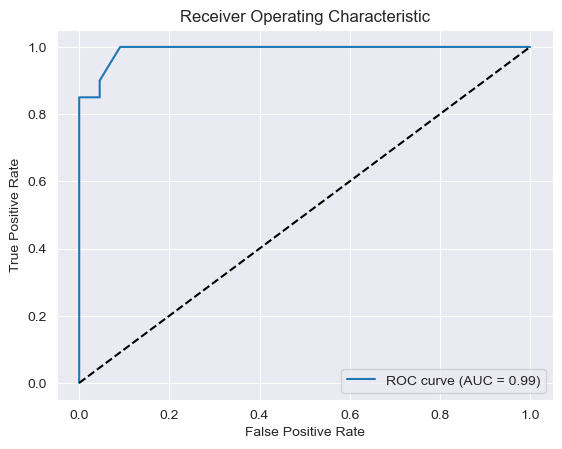

In [20]:
# ROC Curve
from sklearn.metrics import roc_curve, auc

y_proba = rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Hyperparameter Tuning Using GridSearchCV

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best Hyperparameters:
{'max_depth': None, 'max_features': 'sqrt', 'min_samples_split': 4, 'n_estimators': 50}

Accuracy (Tuned RF): 88.1 %

Classification Report:
              precision    recall  f1-score   support

           0       0.81      1.00      0.90        22
           1       1.00      0.75      0.86        20

    accuracy                           0.88        42
   macro avg       0.91      0.88      0.88        42
weighted avg       0.90      0.88      0.88        42



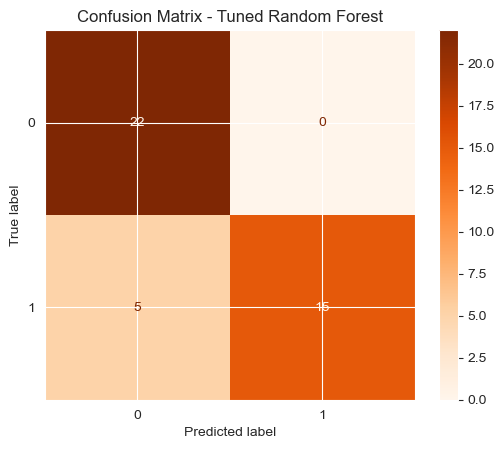

In [21]:
# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 4, 6]
}

# Create GridSearchCV object
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Fit GridSearch to training data
grid_search.fit(X_train, y_train)

# Best parameters and model
print("Best Hyperparameters:")
print(grid_search.best_params_)

best_rf = grid_search.best_estimator_

# Evaluate best model
y_pred_best = best_rf.predict(X_test)

print("\nAccuracy (Tuned RF):", round(accuracy_score(y_test, y_pred_best) * 100, 2), "%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best))

cm_best = confusion_matrix(y_test, y_pred_best)
disp_best = ConfusionMatrixDisplay(confusion_matrix=cm_best, display_labels=best_rf.classes_)
disp_best.plot(cmap="Oranges")
plt.title("Confusion Matrix - Tuned Random Forest")
plt.show()

# Save the Final Model for Deployment

In [22]:
# Import the library

import joblib

# Save model to file
joblib.dump(best_rf, 'sonar_rf_model.pkl')

# Save scaler too (needed to scale new inputs the same way)
joblib.dump(scaler, 'scaler.pkl')

print("Model and scaler saved successfully.")


Model and scaler saved successfully.
